# TIFF images ([documentation](https://pillow.readthedocs.io/en/5.1.x/))

To work with **tiff** images, the **pillow** (PIL) python library can be used. For **FITS**, **astropy** is the best library

In [1]:
from PIL import Image
from astropy.io import fits
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

## load data 

In [2]:
tiff_file = '/EXAMPLES/IPythonNotebookTutorial/Data/Images/test_image.tiff'
tiff_file = 'Data/Images/test_image.tiff'

open an instance to the data in the tiff file

In [3]:
tiff_in = Image.open(tiff_file)

change the tiff data to a numpy array

In [4]:
tiff_array=np.array(tiff_in)

In [5]:
np.shape(tiff_array)

(2048, 2048)

## plot data

<IPython.core.display.Javascript object>


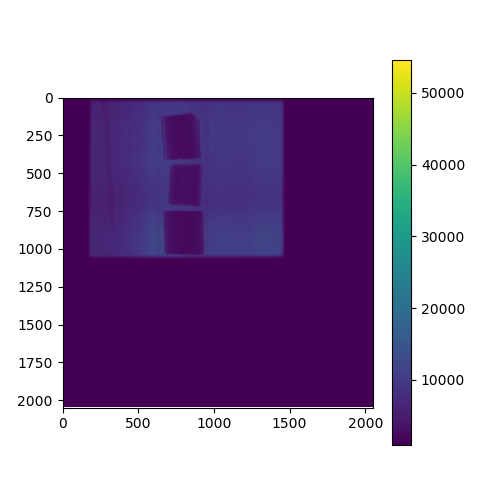

In [6]:
f,ax=plt.subplots(figsize=(5,5))
#plt.figure(figsize=(5,5))
cax=ax.imshow(tiff_array)
f.colorbar(cax)

Let's adjust the color limits, the color map and the x and y limits.
Use the ```<shift>+<tab>``` to see the options for imshow.
Use the set_xlim and set_ylim methods on the ax2 instance

<IPython.core.display.Javascript object>


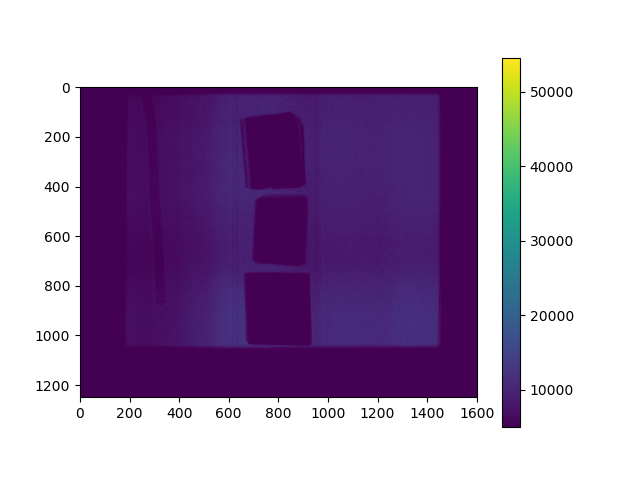

(0, 1600)

In [7]:
f2,ax2=plt.subplots()
cax2=ax2.imshow(tiff_array,vmin=5000)
f2.colorbar(cax2)
ax2.set_ylim((1250,0))
ax2.set_xlim((0,1600))


By default, matplotlib display the data using the "viridis" colormap. But you can easily change it this way. You can find a list of the colormap [here](https://matplotlib.org/examples/color/colormaps_reference.html).

<IPython.core.display.Javascript object>


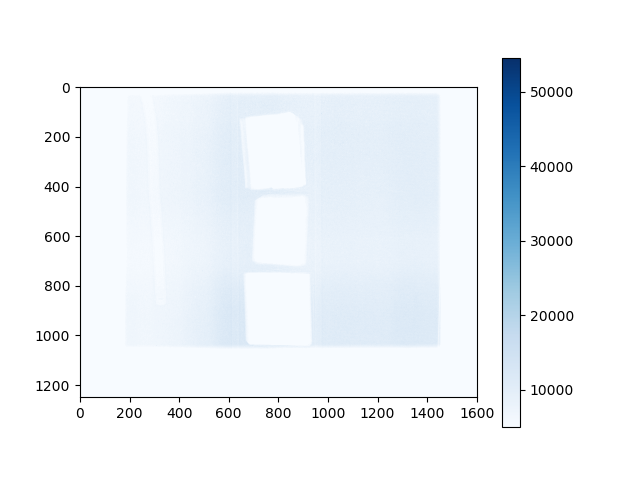

(0, 1600)

In [8]:
f2,ax2=plt.subplots()
cax2=ax2.imshow(tiff_array,vmin=5000, cmap="Blues")
f2.colorbar(cax2)
ax2.set_ylim((1250,0))
ax2.set_xlim((0,1600))

## profile

We can extract a given row, or column using array indexing

<IPython.core.display.Javascript object>


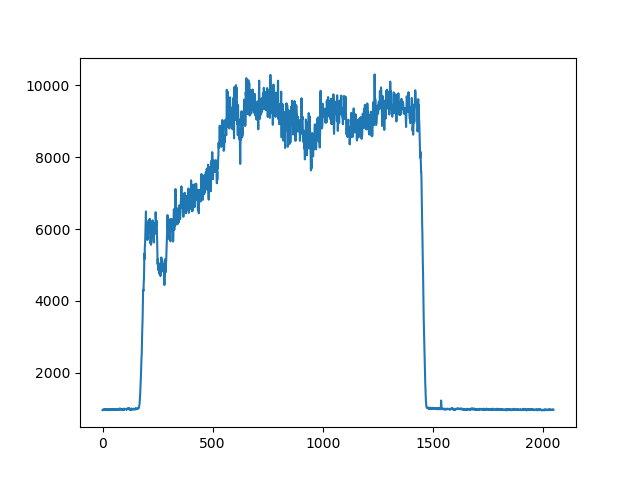

In [9]:
# let's isolate the full column #51 (remember the 0 array indexing in python)
profile = tiff_array[50, :]  

f3,ax3=plt.subplots()
ax3.plot(profile)


This is nice, but it would be nice to browse through the columns. For this, let's introduce the **notebook widgets**

In [10]:
from ipywidgets import widgets
from IPython.html.widgets import interact

/Users/j35/anaconda/envs/py36/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


<IPython.core.display.Javascript object>


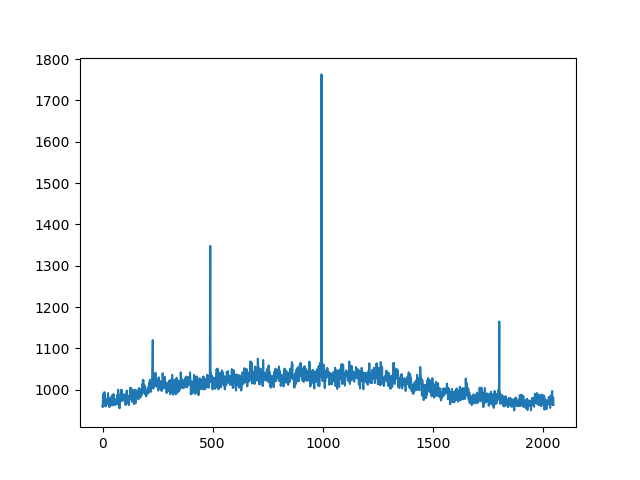

interactive(children=(IntSlider(value=0, description='column', max=2047), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_profile>

In [11]:
[height, width] = np.shape(tiff_array)
fig, ax = plt.subplots()

def plot_profile(column):
    
    profile = tiff_array[column, :]
    ax.clear()
    ax.plot(profile)
    
interact(plot_profile,
        column=widgets.IntSlider(value=0,
                                 min=0,
                                 max=height-1))
    

Let's be fancy here, and let's try to also display the position of this profile on the image

In [12]:
import matplotlib.patches as patches

<IPython.core.display.Javascript object>


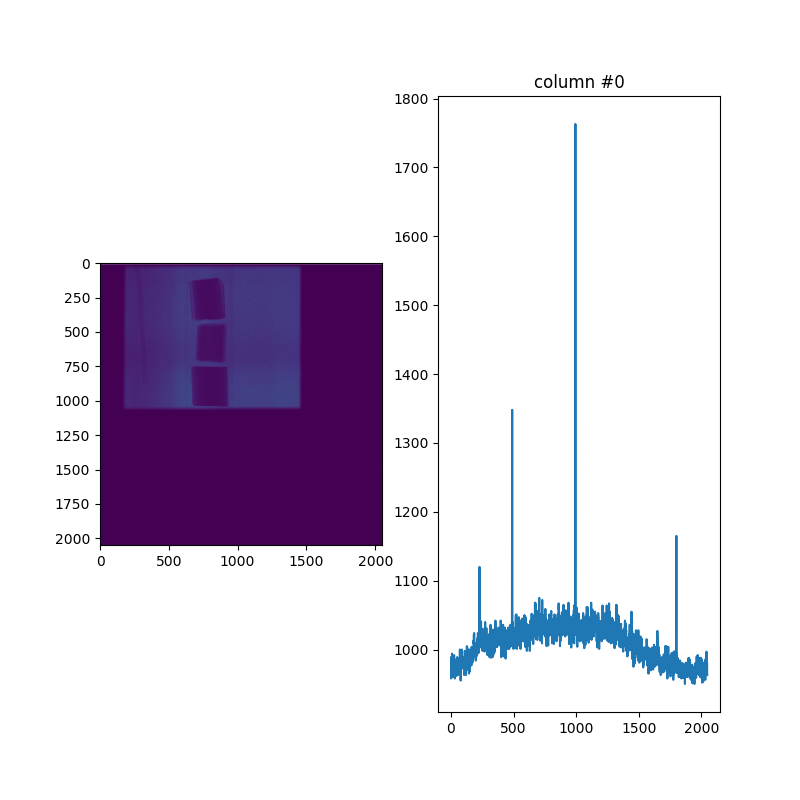

interactive(children=(IntSlider(value=0, description='column', max=2047), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_profile>

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(8,8)) # 1 row, 2 columns
def plot_profile(column):
    
    profile = tiff_array[column, :]
    ax[0].clear()
    ax[0].imshow(tiff_array)
    
    _line = patches.Rectangle((0, column), # top left corner of rectangle
                              width, # width of rectangle (entire width of image)
                              1,  # height of rectangle (1 pixel)
                              edgecolor = 'white',
                              linewidth = 1,
                              fill = False)
    ax[0].add_patch(_line)
                             
    ax[1].clear()
    ax[1].plot(profile)
    ax[1].set_title("column #{}".format(column))
    
interact(plot_profile, 
         column=widgets.IntSlider(value=0,
                                 min=0,
                                 max=height-1))

## extract metadata 

In [14]:
from PIL.ExifTags import TAGS

Since we still have an instance to the tiff file, we can look at any of the Meta data

In [15]:
metadata = tiff_in.tag_v2

for _key, _value in metadata.items():
    print("{}: {}".format(_key, _value))


256: 2048
257: 2048
258: (16,)
259: 1
65024: ('NumImages:5',)
65025: ('ImageCounter:132',)
262: 1
65026: ('MinX:0',)
65027: ('MinY:0',)
65028: ('SizeX:2048',)
65029: ('SizeY:2048',)
65030: ('Temperature:-60.000000',)
65031: ('TemperatureActual:-59.777000',)
65032: ('MotScanDeviceStr:Small Rot',)
65033: ('RotationActual:359.549920',)
271: Unknown
272: Unknown
273: (8,)
65034: ('MotLiftTable.RBV:249.992768',)
65035: ('MotLiftTable:250.000000',)
65036: ('MotShortAxis.RBV:30.003000',)
277: 1
278: 2048
279: (8388608,)
65039: ('MotLongAxis:105.000000',)
65040: ('MotRotTable.RBV:181.999000',)
65041: ('MotRotTable:182.000000',)
65042: ('MotSmallRotTable.RBV:359.549920',)
284: 1
65044: ('MotZaberRot.RBV:-0.003056',)
65045: ('MotZaberRot:0.000000',)
65046: ('MotDetTable.RBV:200.000000',)
65047: ('MotDetTable:200.000000',)
65048: ('MotCameraVert.RBV:-51.699796',)
65049: ('MotCameraVert:-51.699796',)
65050: ('MotHoriTrans.RBV:28.000000',)
65051: ('MotHoriTrans:28.000000',)
65052: ('MotVertTrans.RB

Let's do something with the meta data. 
First find the item key for the Furnace Temperature.  
Then let's split the string and convert the value into a string.

In [16]:
F_Temp_str=metadata[65070]

In [24]:
F_Temp_str[0].split(':')

['FurnaceSampleTemp', '380.100000']

In [25]:
F_Temp_str[0].split(':')[1]

'380.100000'

In [26]:
np.float(F_Temp_str[0].split(':')[1])

380.1

Be sure to close the link to the file

In [27]:
tiff_in.close()